## Data Set Source: https://www.kaggle.com/code/anaghakp/email-spam-detection/input  


## Knowledge: Explanation of What Text Processing Is:
#### Text Processing Explanation:
Text processing involves transforming raw text into a format that can be analysed to extract meaningful information (Roldós, 2019). It involves several steps, including vectorization, lemmatization, stemming, tokenization, and removing stop words. By following these steps, the text can be converted into a structured format that machine learning models can analyse.  


## Application: Explanation of Why the Chosen Dataset Is Appropriate for Analysis with Text Processing:  
#### Why the Dataset Is Appropriate:
The SMS Spam Collection dataset, which comprises SMS messages classified as either 'spam' or 'ham' (non-spam), is appropriate for text processing. This binary classification problem is well-suited for applying various text processing techniques to clean and prepare the text data, which can then be used to train and evaluate machine learning models. As is common with real-world text data, the dataset is reasonable in size and contains a mix of formal and informal language.  

## Application: An Explanation of What the Analysis Is That Will Be Conducted on the Dataset
#### Analysis to Be Conducted:
The analysis aims to build a text classification model to identify spam messages. The steps include:  
1.	Text Preprocessing: Cleaning the text by removing punctuation and stop words, and performing tokenization.
2.	Feature Extraction: Converting text data into numerical features using Term Frequency-Inverse Document Frequency (TF-IDF).
3.	Model Training: Training a Naive Bayes classifier on the processed text data.
4.	Model Evaluation: Evaluating the model's performance using accuracy, precision, recall, and F1 score.
5.	Model Improvement: Experimenting with different preprocessing techniques and hyperparameters to enhance model performance.  

## Application: A Pipeline Is Used in the Python Code
#### Pipeline Usage:
The code provided uses a Pipeline from the sklearn.pipeline module to chain multiple steps in the analysis process. The pipeline includes:
- CountVectorizer: For converting text data into a matrix of token counts.
- TfidfTransformer: For converting token counts into TF-IDF features.
- MultinomialNB: For training a Naive Bayes classifier.  

## Knowledge: An Explanation of the Process Used for the Data Analysis
#### Process Explanation:
1.	Loading Data: The dataset is read into a pandas DataFrame, and unnecessary columns are dropped.
2.	Text Preprocessing: A custom function is defined to remove punctuation and stop words from the text data.
3.	Splitting Data: The data is split into training and test sets to evaluate the model's performance on unseen data.
4.	Pipeline Creation: A pipeline is created to streamline the process of text vectorization and classification.
5.	Model Training: The pipeline is used to fit the model on the training data.
6.	Making Predictions: The trained model is used to make predictions on the test data.
7.	Evaluation: The model's performance is evaluated using classification metrics.
8.	Example Predictions: The model is tested with new example messages to demonstrate its predictive capabilities.

In [26]:
# Import libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [27]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lab_services_student\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lab_services_student\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lab_services_student\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df.dropna(axis=1, inplace=True)
df.columns = ['label', 'message']

print("This code reads a dataset named 'spam.csv'")

This code reads a dataset named 'spam.csv'


In [29]:
# Check for missing values
print(df.isnull().sum())

print("\nThis code prints the sum of missing values in each column of the DataFrame 'df'.")

label      0
message    0
dtype: int64

This code prints the sum of missing values in each column of the DataFrame 'df'.


In [30]:
# Display the columns of the dataset
df.columns

Index(['label', 'message'], dtype='object')

In [31]:
# Display the first 5 rows of the dataset
df.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [32]:
# ***************************************************************************************
#    Title: Introduction to NLTK: Tokenization, Stemming, Lemmatization, POS Tagging
#    Author: GeeksforGeeks
#    Date Published: 01 May 2024 
#    Date Retrieved: 20 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/introduction-to-nltk-tokenization-stemming-lemmatization-pos-tagging/
#
# ***************************************************************************************

# ***************************************************************************************
#    Title: Python | Stemming words with NLTK
#    Author: GeeksforGeeks
#    Date Published: 15 April 2023
#    Date Retrieved: 20 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/
#
# ***************************************************************************************

# Text preprocessing function with Stemming and Lemmatization
def text_process(mess):
    STOPWORDS = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    porter = PorterStemmer()
    nopunc = ''.join([char for char in mess if char not in string.punctuation])
    tokens = word_tokenize(nopunc.lower())
    stemmed_words = [porter.stem(word) for word in tokens if word not in STOPWORDS]
    return ' '.join(stemmed_words)

print("\nThis code preprocesses text by stemming and removing stopwords.")


This code preprocesses text by stemming and removing stopwords.


In [33]:
# Apply text preprocessing
df['clean_msg'] = df['message'].apply(text_process)

print("\nThis code applies text preprocessing to a DataFrame column.")


This code applies text preprocessing to a DataFrame column.


In [34]:
# ***************************************************************************************
#    Title: Label Encoding in Python
#    Author: GeeksforGeeks
#    Date Published: 1 April 2023
#    Date Retrieved: 22 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/
#
# ***************************************************************************************

# Encode labels
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})

print("\nThis code encodes 'ham' as 0 and 'spam' as 1.")
df.head()


This code encodes 'ham' as 0 and 'spam' as 1.


,label,message,clean_msg,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt 21st...,1
3,ham,U dun say so early hor... U c already then say...,dun say earli hor c alreadi say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,0


In [35]:
# ***************************************************************************************
#    Title: Machine Learning - Train/Test
#    Author: W3Schools
#    Date Published: 2024
#    Date Retrieved: 24 June 2024
#    Code version: 1
#    Availability: https://www.w3schools.com/python/python_ml_train_test.asp
#
# ***************************************************************************************

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_msg'], df['label_num'], test_size=0.2, random_state=1)

print("\nThis code splits dataset for training and testing.")
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


This code splits dataset for training and testing.
(4457,)
(1115,)
(4457,)
(1115,)


In [36]:
# ***************************************************************************************
#    Title: SVM Hyperparameter Tuning using GridSearchCV | ML
#    Author: GeeksforGeeks
#    Date Published: 11 January 2023
#    Date Retrieved: 25 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#
# ***************************************************************************************

# Create a pipeline with GridSearchCV for hyperparameter tuning
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

print("\nThis code creates a pipeline for text classification.")


This code creates a pipeline for text classification.


In [52]:
# ***************************************************************************************
#    Title: Hyperparameter tuning using GridSearchCV and KerasClassifier
#    Author: GeeksforGeeks
#    Date Published: 20 May 2024
#    Date Retrieved: 25 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/
#
# ***************************************************************************************

# Define the parameters for GridSearchCV
parameters = {'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'clf__alpha': (1e-2, 1e-3)
}

print("\nThis code defines parameters for GridSearchCV tuning for text classification.")


This code defines parameters for GridSearchCV tuning for text classification.


In [38]:
# ***************************************************************************************
#    Title: SVM Hyperparameter Tuning using GridSearchCV | ML
#    Author: GeeksforGeeks
#    Date Published: 11 January 2023
#    Date Retrieved: 25 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#
# ***************************************************************************************

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': (0.01, 0.001),
                         'tfidf__max_df': (0.5, 0.75, 1.0),
                         'tfidf__ngram_range': ((1, 1), (1, 2))},
             verbose=1)

In [39]:
# Print the best parameters found by GridSearchCV
print("Best parameters:")
print(grid_search.best_params_)

Best parameters:
{'clf__alpha': 0.01, 'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2)}


In [40]:
# Make predictions using a grid search model
predictions = grid_search.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
# Evaluate the model
print("\nThis code evaluates a machine learning model:\n")
print("Classification Report:\n", classification_report(y_test, predictions))  # Shows precision, recall, F1-score per class


This code evaluates a machine learning model:

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.98      0.92      0.95       139

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [42]:
# Evaluate the model
print("\nThis code evaluates a machine learning model:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))  # Displays true/false positives/negatives


This code evaluates a machine learning model:

Confusion Matrix:
 [[973   3]
 [ 11 128]]


In [43]:
# Evaluate the model
print("\nThis code evaluates a machine learning model:\n")
print("Accuracy Score: ", accuracy_score(y_test, predictions))  # Calculates the accuracy of the model


This code evaluates a machine learning model:

Accuracy Score:  0.9874439461883409


In [44]:
X_test[predictions > y_test] # print false positives (ham incorrectly classifier)

420     yesfrom last week take live call
4987                             channel
494                     free nowcan call
Name: clean_msg, dtype: object

In [45]:
X_test[predictions < y_test] # print false positives (ham incorrectly classifier)

3528    xma new year eve ticket sale club day 10am til...
1662    hi lookin sauci daytim fun wiv busti marri wom...
3417    life never much fun great came made truli spec...
2773    come take littl time child afraid dark becom t...
1960    guess somebodi know secretli fanci wan na find...
517      credit top httpwwwbubbletextcom renew pin tgxxrz
2078                         85233 freeringtonerepli real
1457    clair havin borin time alon wan na cum 2nite c...
190     uniqu enough find 30th august wwwareyouuniquecouk
2429    guess ithi first time creat web page wwwasjesu...
1021    guess somebodi know secretli fanci wan na find...
Name: clean_msg, dtype: object

In [51]:
# Add predicted labels to the dataset
df['pred_label'] = grid_search.predict(df['clean_msg'])

print("\nThis code adds predicted labels to the dataset.")

df.head()


This code adds predicted labels to the dataset.


,label,message,clean_msg,label_num,pred_label
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...,0,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt 21st...,1,1
3,ham,U dun say so early hor... U c already then say...,dun say earli hor c alreadi say,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though,0,0



This code visualizes a confusion matrix.


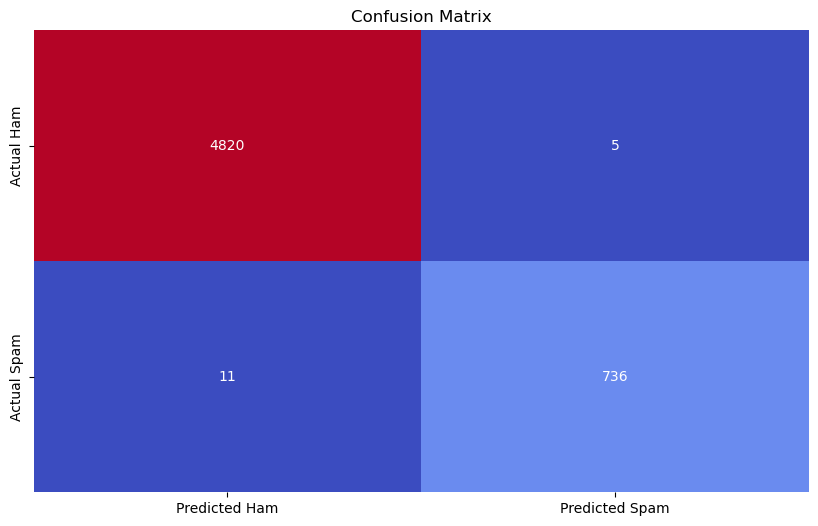

In [47]:
# ***************************************************************************************
#    Title: Confusion Matrix in Machine Learning
#    Author: GeeksforGeeks
#    Date Published: 13 May 2024
#    Date Retrieved: 27 June 2024
#    Code version: 1
#    Availability: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
#
# ***************************************************************************************

# Visualize the results using a confusion matrix
print("\nThis code visualizes a confusion matrix.")

conf_matrix = pd.DataFrame(confusion_matrix(df['label_num'], df['pred_label']),
                        index=['Actual Ham', 'Actual Spam'], columns=['Predicted Ham', 'Predicted Spam'])

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Example predictions
print("\nThis code predicts text using a trained model.")

print("\nPrediction for 'I love hiking in the mountains.': ", grid_search.predict(["I love hiking in the mountains."]))
print("Prediction for 'SHOPRITE XTRA SAVINGS: Get 5kg Goldi frozen mixed chicken portions for R169.99. Valid 05 - 11 June 2024. SMS=STOP': ", grid_search.predict(["SHOPRITE XTRA SAVINGS: Get 5kg Goldi frozen mixed chicken portions for R169.99. Valid 05 - 11 June 2024. SMS=STOP"]))


This code predicts text using a trained model.

Prediction for 'I love hiking in the mountains.':  [0]
Prediction for 'SHOPRITE XTRA SAVINGS: Get 5kg Goldi frozen mixed chicken portions for R169.99. Valid 05 - 11 June 2024. SMS=STOP':  [1]


# References
•	GeeksforGeeks. (2023, April 18). Label Encoding in Python. Retrieved June 22, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/  
•	GeeksforGeeks. (2023, April 15). Python | Stemming words with NLTK. Retrieved June 20, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/  
•	GeeksforGeeks. (2023, January 11). SVM Hyperparameter Tuning using GridSearchCV | ML. Retrieved June 25, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/  
•	GeeksforGeeks. (2024, May 13). Confusion Matrix in Machine Learning. Retrieved June 27, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/  
•	GeeksforGeeks. (2024, March 20). Hyperparameter tuning using GridSearchCV and KerasClassifier. Retrieved June 25, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/hyperparameter-tuning-using-gridsearchcv-and-kerasclassifier/  
•	GeeksforGeeks. (2024, May 1). Introduction to NLTK: Tokenization, Stemming, Lemmatization, POS Tagging. Retrieved June 20, 2024, from GeeksforGeeks: https://www.geeksforgeeks.org/introduction-to-nltk-tokenization-stemming-lemmatization-pos-tagging/  
•	P, A. K. (2023). EMAIL SPAM DETECTION. Retrieved June 18, 2024, from Kaggle: https://www.kaggle.com/code/anaghakp/email-spam-detection/input  
•	Roldós, I. (2019, November 15). Text Processing: What Is It? Retrieved June 18, 2024, from MonkeyLearn: https://monkeylearn.com/blog/text-processing/#:~:text=Text%20processing%20is%20the%20automated,data%20to%20gain%20valuable%20insights  
•	WsSchools. (2024). Machine Learning - Train/Test. Retrieved June 24, 2024, from WsSchools: https://www.w3schools.com/python/python_ml_train_test.asp  

